In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb
import GPy.inference.latent_function_inference.exact_gaussian_inference as eg

In [2]:
mat_file = io.loadmat('2014_Dataset1.mat')
t = mat_file['t']
p1 = mat_file['p1']
p2 = mat_file['p2']
t = t*24

In [3]:
le = 288*7
x_1 = np.arange(0,le,1)
x_1 = np.reshape(x_1,[len(x_1),1])

start = 0
p1_1 = p1[start:start+le]
p2_1 = p2[start:start+le]
y_1 = p1_1
y_2 = p2_1 

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


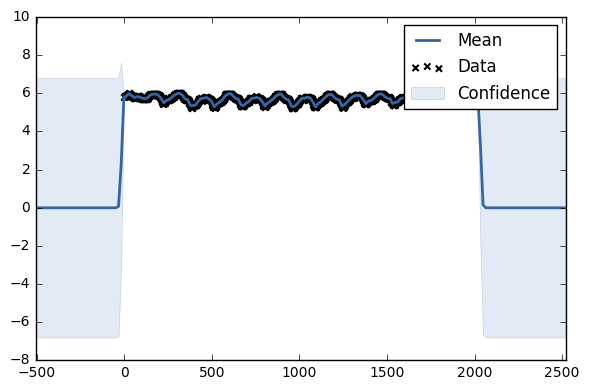

In [6]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(x_1,y_1,kernel)
m.optimize()
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

In [40]:
m

GP_regression.,value,constraints,priors
rbf.variance,12.0229698398,+ve,
rbf.lengthscale,9.87454050837,+ve,
Gaussian_noise.variance,0.000205736709275,+ve,


In [14]:
lkd = np.zeros(len(x_1))
for i in range(len(x_1)):
    p, lkd[i], grad = eg.ExactGaussianInference.inference(m, m.kern, x_1[i:i+1], m.likelihood, y_1[i:i+1])

In [43]:
kernel.K(x_1[0:4])

array([[ 12.02296984,  11.96147553,  11.77887333,  11.48070991],
       [ 11.96147553,  12.02296984,  11.96147553,  11.77887333],
       [ 11.77887333,  11.96147553,  12.02296984,  11.96147553],
       [ 11.48070991,  11.77887333,  11.96147553,  12.02296984]])

In [47]:
def plot_2outputs(m,xlim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_1)),ax=ax2)

In [32]:
p, lkd, grad = eg.ExactGaussianInference.inference(m, m.kern, x_1[0:2016], m.likelihood, y_1[0:2016])
lkd

4039.6163029461336

In [49]:
K1 = GPy.kern.RBF(1)

lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1])

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


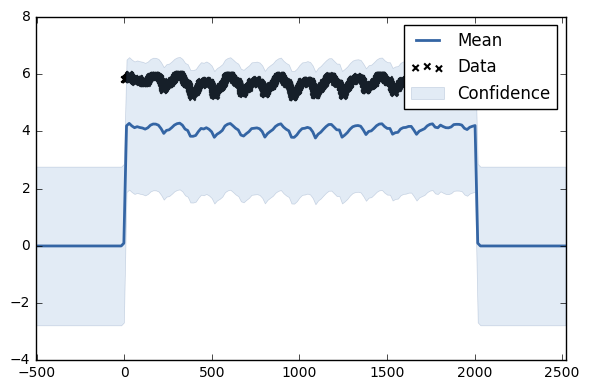

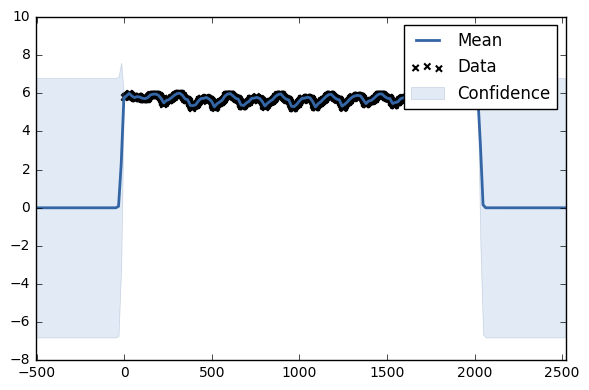

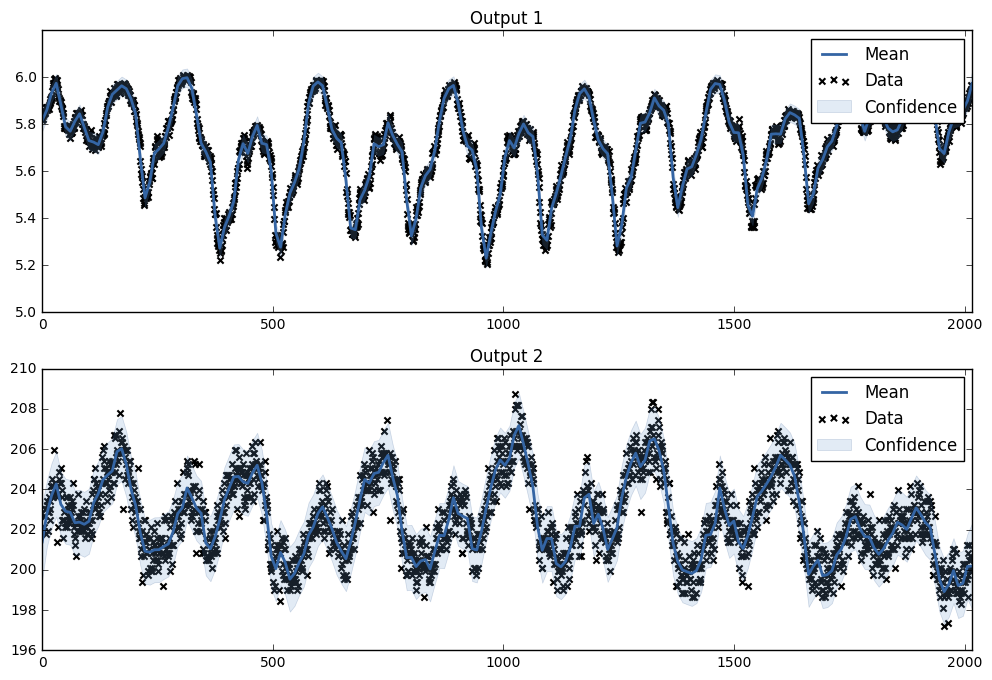

In [50]:
mul = GPy.models.GPCoregionalizedRegression([x_1,x_1],[y_1,y_2],kernel = lcm)
mul.optimize()
plot_2outputs(mul, xlim=(0,len(x_1)))
plt.show()